In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The likelihood function $L(\theta|x)$ measures the support provided by the observed data $x$ to the different values of the parameters $\theta$. It is commonly used to determine what is the most plausible value for the parameters of a distribution given the observed data by looking for the peak that maximises the likelihood. The procedure to obtain this maximum is known as Maximum Likelihood Estimation (MLE).

A likelihood function is not a pdf. This means that it is not normalised and the area has not to add up to one. 

## Bernoulli distribution

In this first example we calculate the likelihood of $p_H$, that is, the probability of getting heads when flipping a coin. To that end, we flip a coin multiple times.

In [2]:
np.random.seed(1)

In [3]:
REAL_PH = 0.7

In [4]:
FLIPS_PER_IT = 10

In [5]:
IT = 20

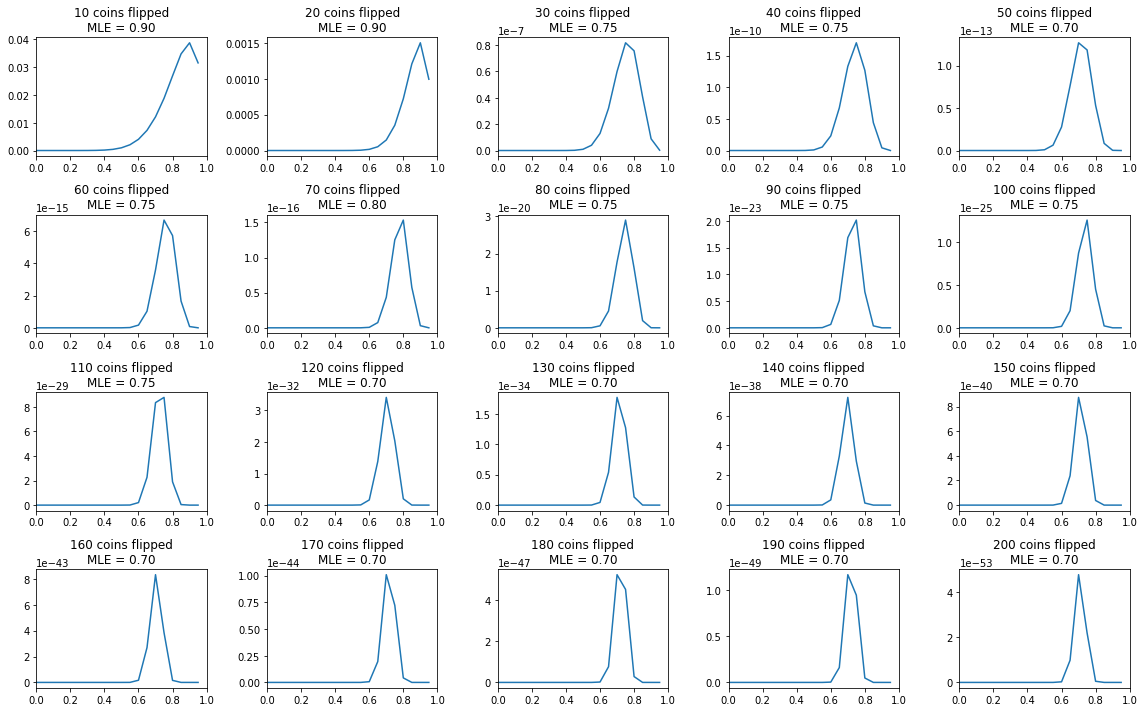

In [6]:
flips = np.array([])
theta = np.arange(0, 1, 0.05)

fig, ax = plt.subplots(4, int(IT / 4))

for i in range(IT):
    # Passing n = 1 to the binomial random numbers generator is equivalent to generating random values
    # from a Bernoulli distribution
    flips = np.concatenate((flips, np.random.binomial(size = FLIPS_PER_IT, n = 1, p = REAL_PH)))
    
    heads = np.sum(flips)
    tails = flips.shape[0] - heads
    
    likelihood = np.power(theta, heads) * np.power(1 - theta, tails)
    
    mle = theta[np.argmax(likelihood)]
    
    row = int(i / int(IT / 4))
    col = i % int(IT / 4)
    ax[row, col].plot(theta, likelihood)
    ax[row, col].set_title(str((i + 1) * FLIPS_PER_IT) + ' coins flipped\nMLE = ' + '{0:.2f}'.format(mle))
    ax[row, col].set_xlim([0, 1])

fig.set_figwidth(16)    
fig.set_figheight(10)   
plt.tight_layout()

## Poisson distribution

In this second example we estimate the likelihood of different values of $\lambda$ for a Poisson distribution. For that effect, we observe the number of times the event modelled by means of the Poisson distribution occurs at different independent time intervals. 

In [7]:
REAL_LAMBDA = 20

In [8]:
DAYS_PER_IT = 10

In [9]:
np.random.poisson(10, 1)

array([17])

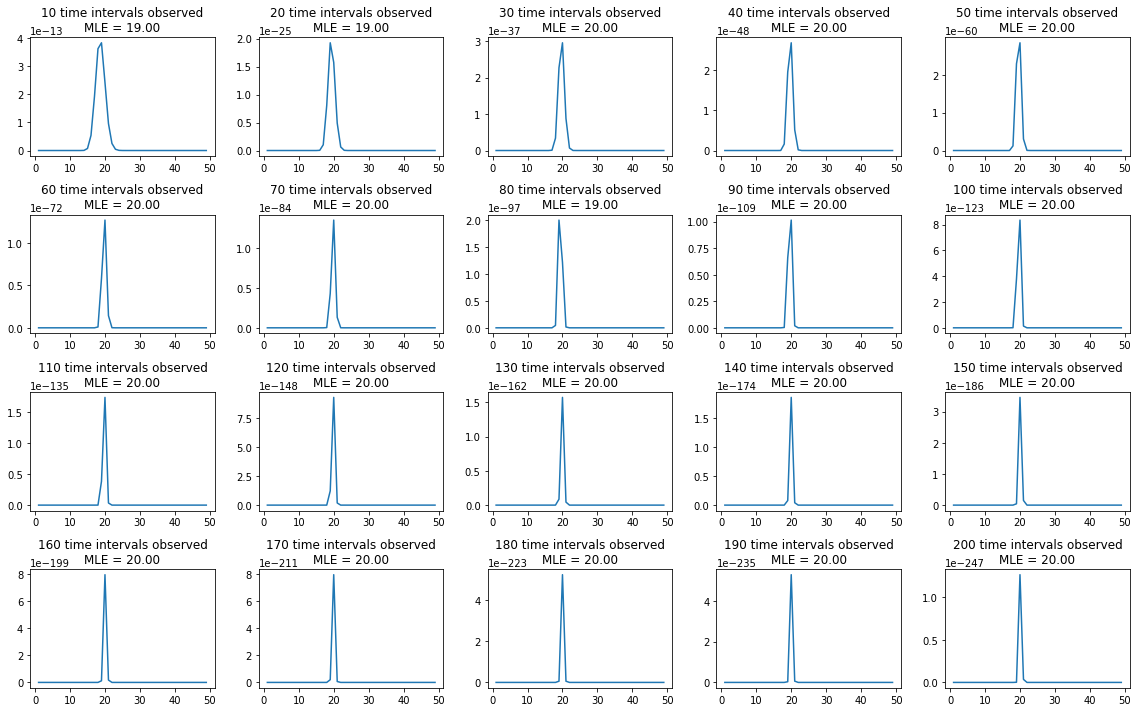

In [10]:
observations = np.array([])
lambdas = np.arange(1, 50)

fig, ax = plt.subplots(4, int(IT / 4))

for i in range(IT):
    observations = np.concatenate((observations, np.random.poisson(REAL_LAMBDA, DAYS_PER_IT)))
    
    # count number of times that each number of occurrences happened
    counts = pd.Series(observations).value_counts().reset_index()
    counts.columns = ['occurr', 'freq']
    
    # for each value of lambda, the likelihood is calculated as the product of the probability
    # of each number of occurrences obtained in the observations
    if counts['occurr'].max() > lambdas[-1]:
        lambdas = np.arange(1, counts['occurr'].max())
    likelihood = []
    for l in lambdas:
        counts['p'] = counts['occurr'].apply(lambda x: (l ** x * math.e ** (-l)) / (math.factorial(x))) ** counts['freq']
        likelihood.append(counts['p'].product())
    likelihood = np.array(likelihood)
    
    mle = lambdas[np.argmax(likelihood)]
    
    row = int(i / int(IT / 4))
    col = i % int(IT / 4)
    ax[row, col].plot(lambdas, likelihood)
    ax[row, col].set_title(str((i + 1) * FLIPS_PER_IT) + ' time intervals observed\nMLE = ' + '{0:.2f}'.format(mle))

fig.set_figwidth(16)    
fig.set_figheight(10)   
plt.tight_layout()